In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [14]:
data = pd.read_csv("Breast_cancer_data.csv")

In [15]:
data.describe() 

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [16]:
data.isnull().any()

mean_radius        False
mean_texture       False
mean_perimeter     False
mean_area          False
mean_smoothness    False
diagnosis          False
dtype: bool

# Exploratory Data Analysis
## Barplot

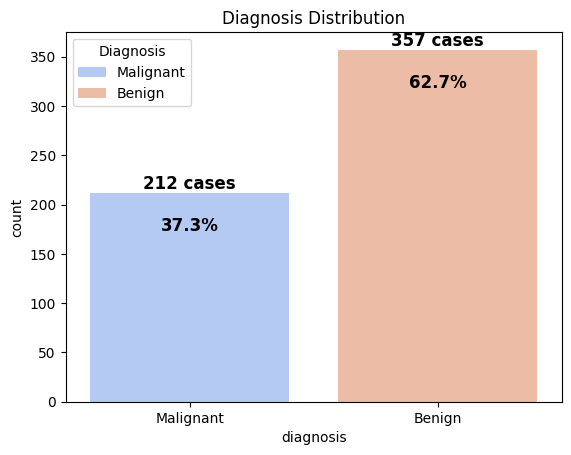

In [17]:
from matplotlib.legend_handler import HandlerTuple
# Create the countplot
ax = sns.countplot(x='diagnosis', data=data, hue='diagnosis', palette='coolwarm', legend=True)
# Modify legend labels
legend_labels = ['Malignant', 'Benign']
handles, _ = ax.get_legend_handles_labels()  # Get current legend items
ax.legend(handles, legend_labels, title="Diagnosis")  # Update legend

#ax is to modify the plot later, hue and legend becauuse of a FutureWarning in palette


plt.title("Diagnosis Distribution")

for container in ax.containers:
    labels = [f"{int(v.get_height())} cases\n\n{v.get_height() / data.shape[0] * 100:.1f}%" for v in container]
    
    ax.bar_label(container, labels=labels, fontsize=12, padding=-30, color="black", weight="bold")

ax.set_xticks([0, 1])  # Set tick positions for 0 and 1
ax.set_xticklabels(["Malignant", "Benign"])  # Set custom labels

plt.show()

## Histogram

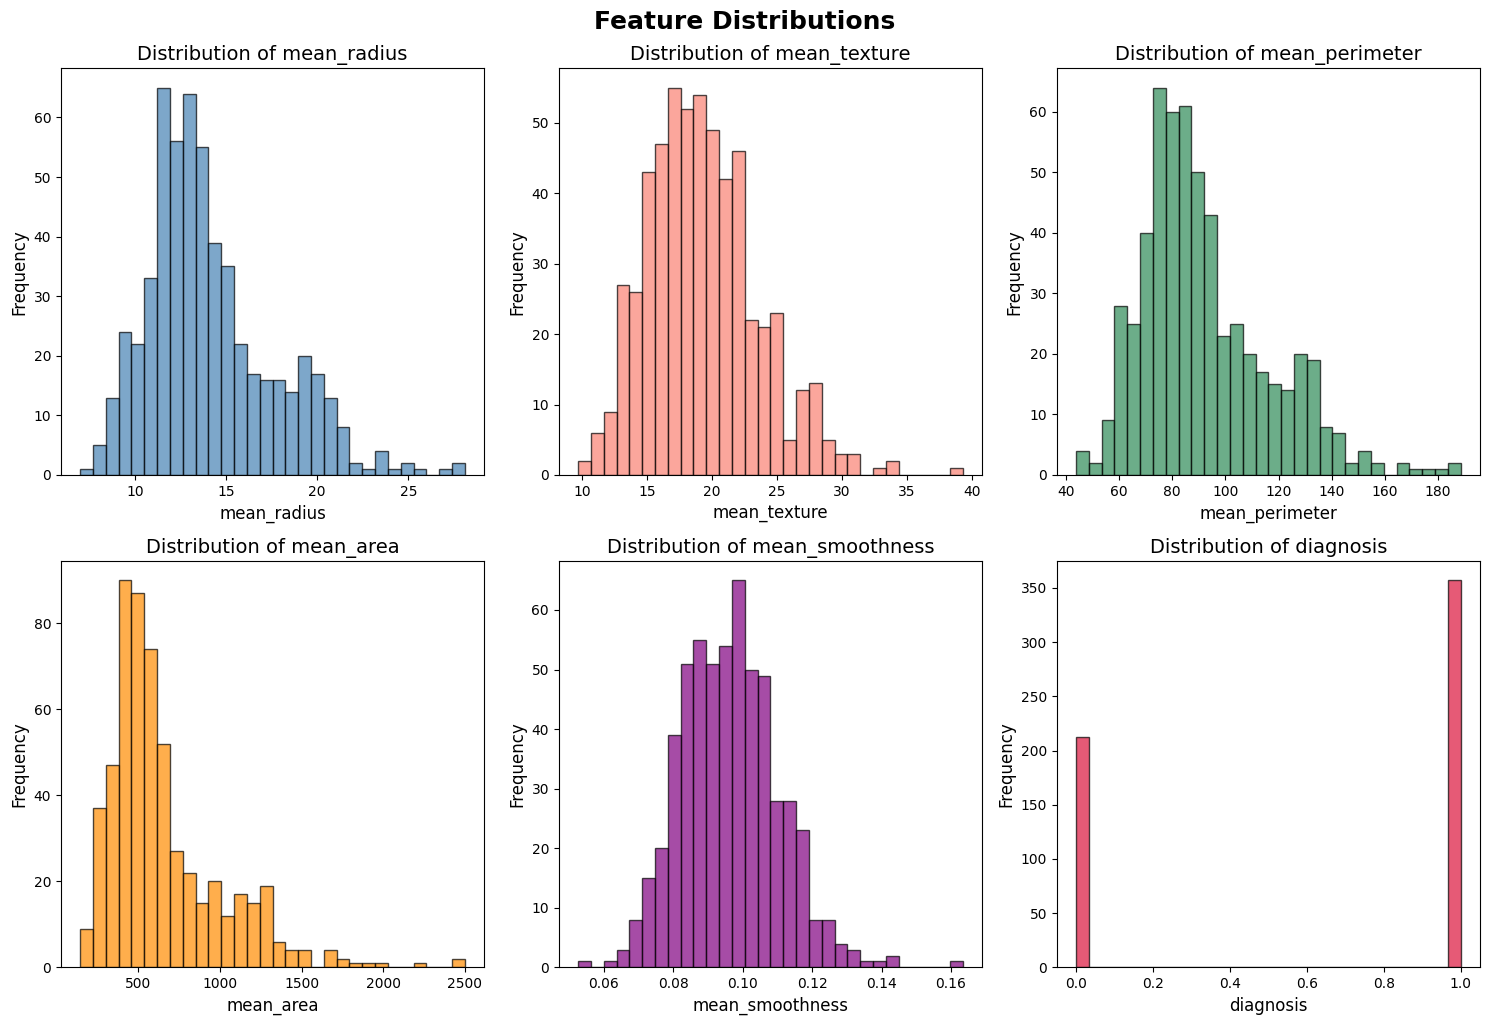

In [18]:
# Set up a grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjusted for 6 features
axes = axes.flatten()  # Flatten to loop easily

# Define histogram color palette
colors = ["steelblue", "salmon", "seagreen", "darkorange", "purple", "crimson"]

# Loop through selected numerical columns
for i, col in enumerate(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'diagnosis']):
    axes[i].hist(data[col], bins=30, color=colors[i % len(colors)], edgecolor="black", alpha=0.7)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.suptitle("Feature Distributions", fontsize=18, fontweight="bold", y=1.02)
plt.show()

## Boxplot

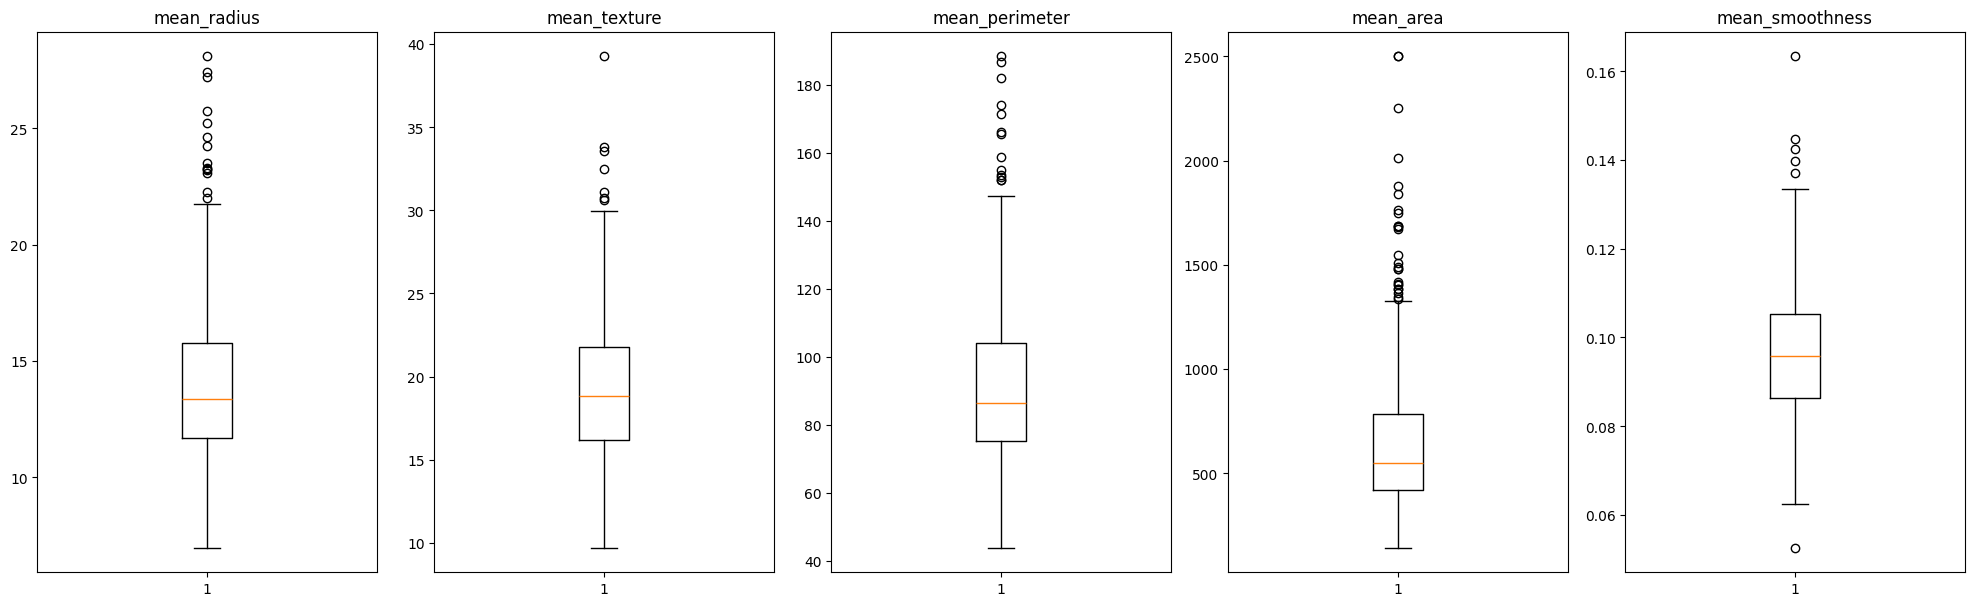

In [19]:
fig, ax = plt.subplots(1, 5, figsize=(20,6))

plt.tight_layout()
ax[0].set_title("mean_radius")
ax[0].boxplot(data['mean_radius'])

ax[1].set_title('mean_texture')
ax[1].boxplot(data["mean_texture"])

ax[2].set_title('mean_perimeter')
ax[2].boxplot(data["mean_perimeter"])

ax[3].set_title('mean_area')
ax[3].boxplot(data["mean_area"])

ax[4].set_title('mean_smoothness')
ax[4].boxplot(data["mean_smoothness"])
plt.show()

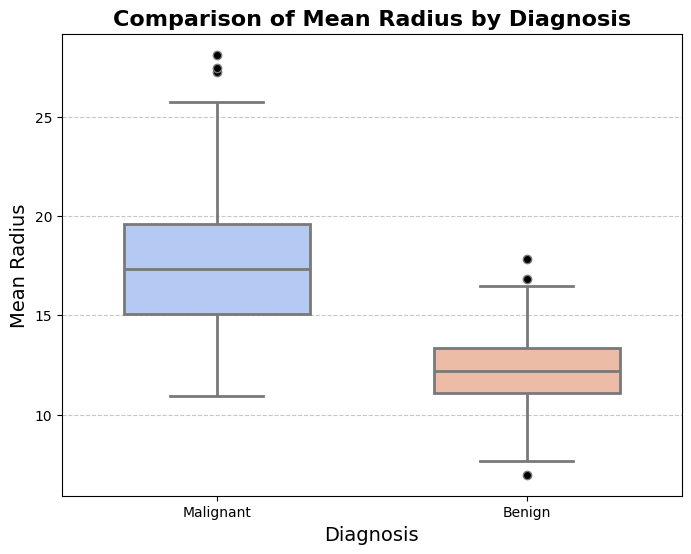

In [20]:
# Set figure size
f, ax = plt.subplots(figsize=(8, 6))

# Create the boxplot with improvements
sns.boxplot(
    x="diagnosis", 
    y="mean_radius", 
    data=data, 
    palette="coolwarm",   # Set a better color palette
    width=0.6,            # Adjust box width
    flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'black'},  # Outlier style
    linewidth=2           # Increase line thickness
)

# Customizing the plot
ax.set_xticks([0, 1])                          #
ax.set_xticklabels(["Malignant", "Benign"])  # Replace 0 and 1 with labels
ax.set_xlabel("Diagnosis", fontsize=14)
ax.set_ylabel("Mean Radius", fontsize=14)
ax.set_title("Comparison of Mean Radius by Diagnosis", fontsize=16, fontweight="bold")

# Add gridlines
ax.grid(axis='y', linestyle="--", alpha=0.7)

# Show the plot
plt.show()

## Grouped-Bar plot

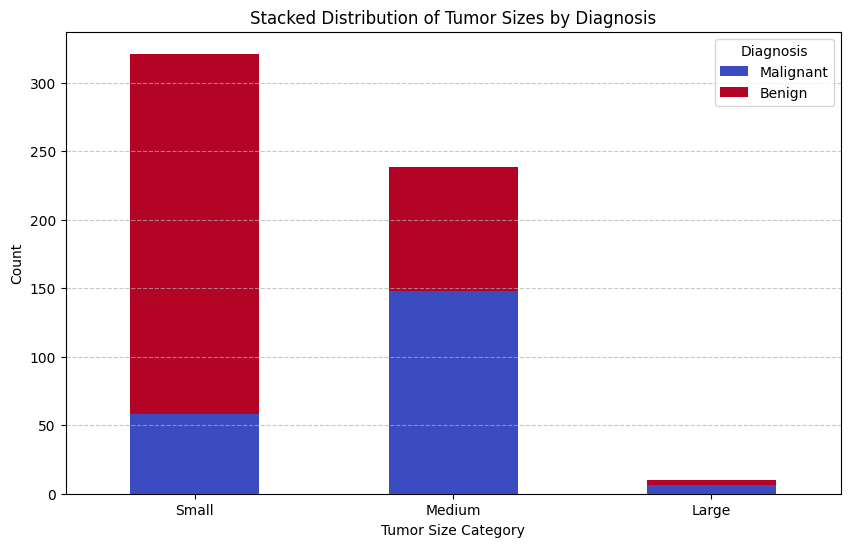

In [21]:
# Work on a copy of the dataset to prevent modification
data_copy = data.copy()

# Create the binned variable
data_copy["radius_category"] = pd.cut(data_copy["mean_texture"], bins=3, labels=["Small", "Medium", "Large"])

# Create a grouped count of each category
grouped_counts = data_copy.groupby(["radius_category", "diagnosis"]).size().unstack()

# Create a stacked bar plot
ax = grouped_counts.plot(kind="bar", stacked=True, figsize=(10,6), colormap="coolwarm")

# Add labelsx
plt.title("Stacked Distribution of Tumor Sizes by Diagnosis")
plt.xlabel("Tumor Size Category")
plt.ylabel("Count")

# Customize legend
plt.legend(title="Diagnosis", labels=["Malignant", "Benign"])

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Improve readability with grid lines
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the plot
plt.show()

## Heatmap

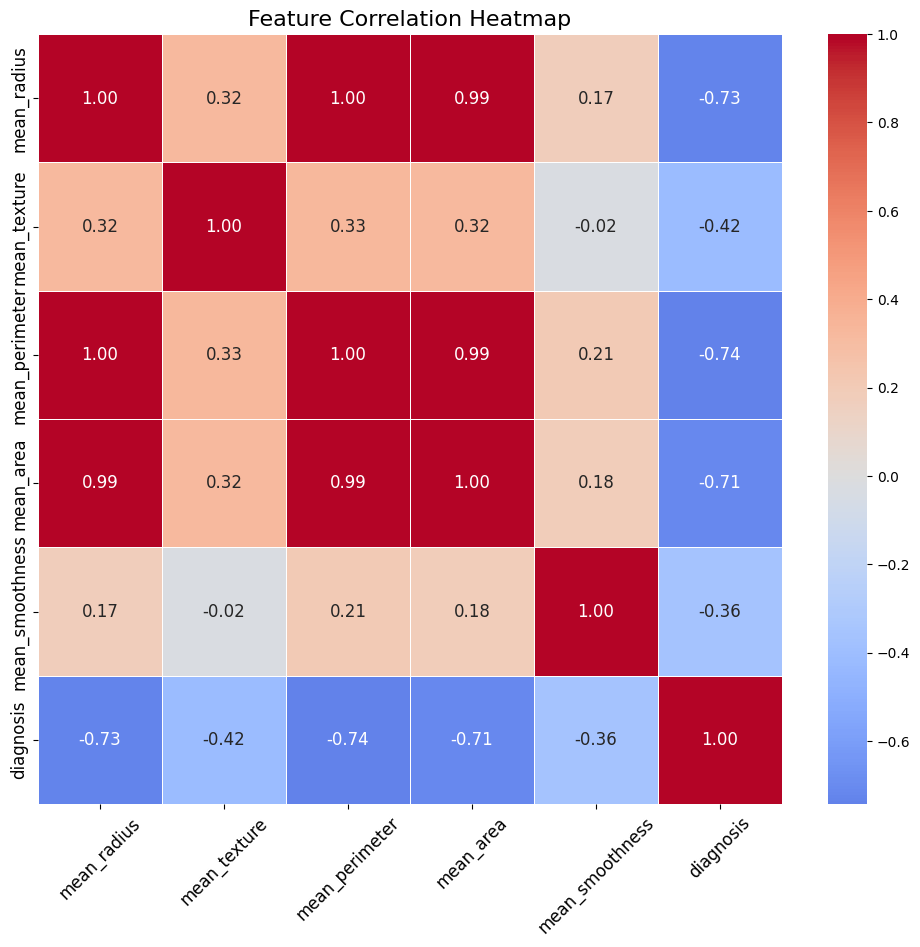

In [22]:
plt.figure(figsize=(12,10))

cor = data[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'diagnosis']].corr() #correlation matrix

sns.heatmap(cor, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=0.5, annot_kws={"size": 12})

plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for clarity
plt.yticks(fontsize=12)
plt.show()

## Clustermap

<Figure size 1200x1000 with 0 Axes>

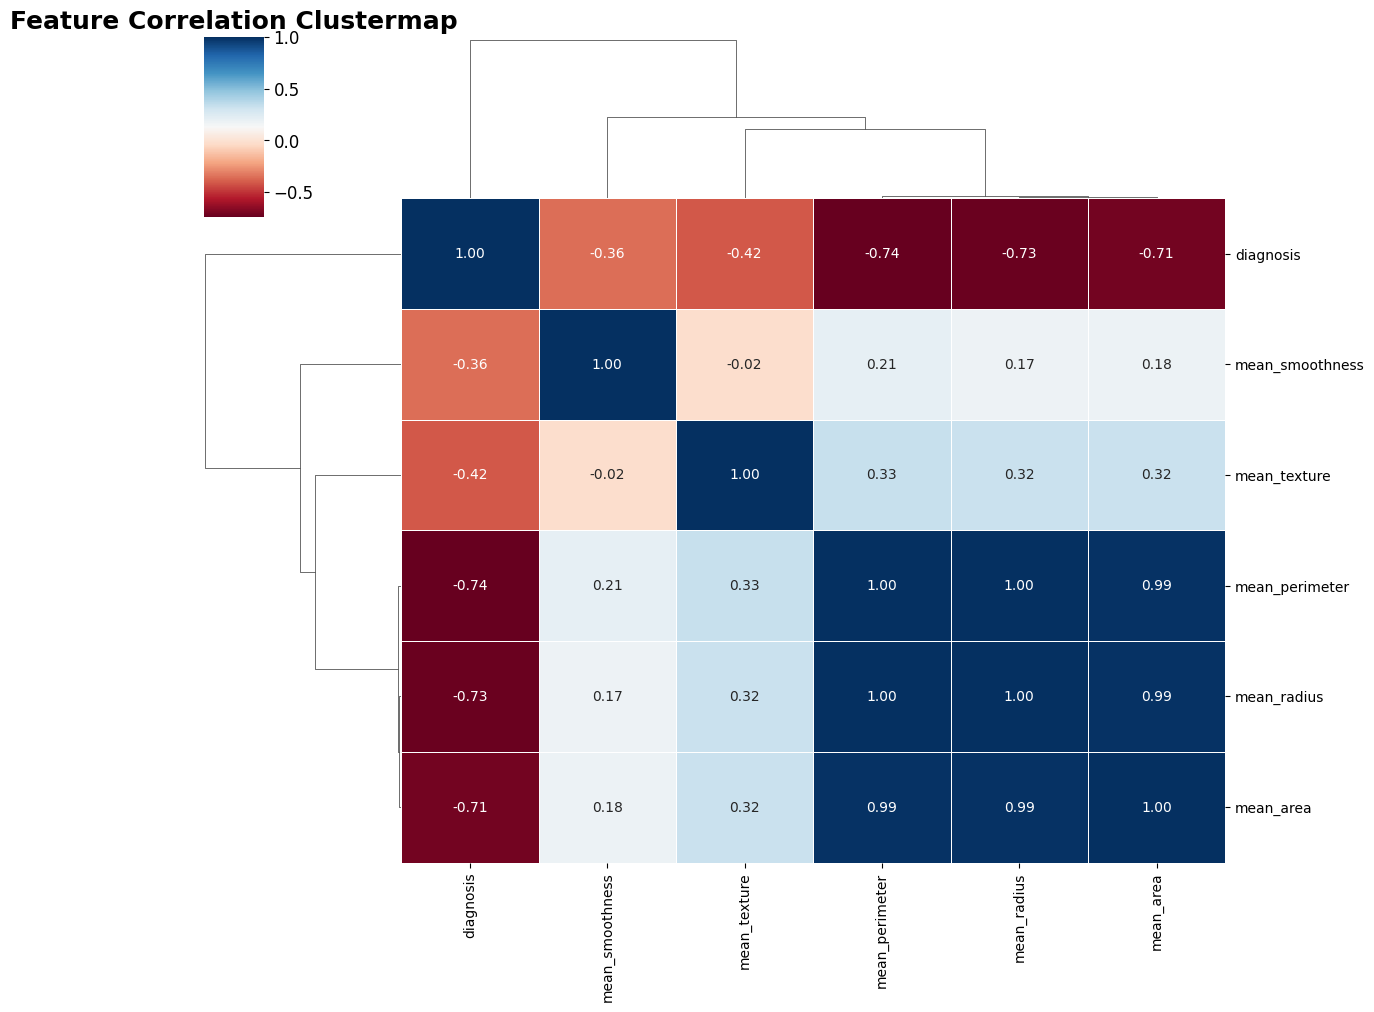

In [23]:
plt.figure(figsize=(12, 10))  # Set figure size

sns.clustermap(
    cor, 
    annot=True,  # Display correlation values
    fmt=".2f",  # Format numbers to 2 decimal places
    cmap="RdBu",  # Improved color map for contrast
    linewidths=0.5,  # Add grid lines for clarity
    annot_kws={"size": 10},  # Adjust annotation size
    figsize=(12, 10),  # Control the figure size
    cbar_pos=(0.02, 0.8, 0.05, 0.18)  # Adjust colorbar position for better aesthetics
)

plt.title("Feature Correlation Clustermap", fontsize=18, fontweight="bold")  # Title formatting
plt.xticks(fontsize=12)  # Adjust x-axis labels
plt.yticks(fontsize=12)  # Adjust y-axis labels

plt.show()

## Pairplot

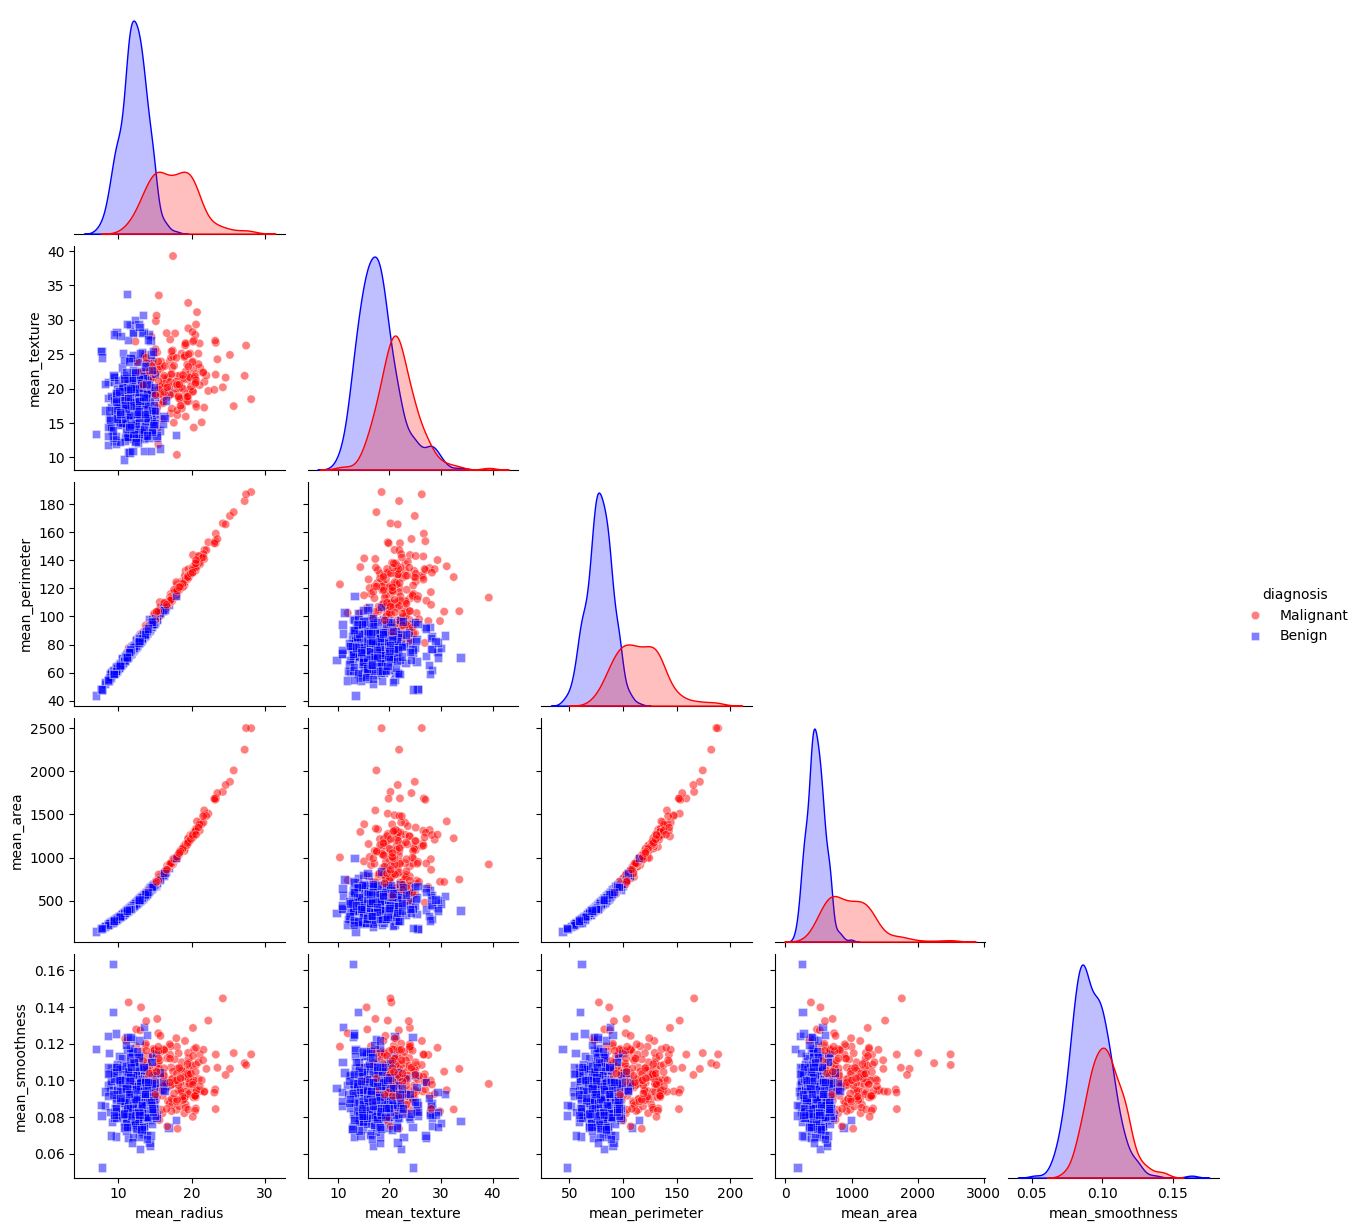

In [24]:
warnings.filterwarnings("ignore")  # Ignore warnings for clarity

# Create a temporary copy with mapped labels
temp_data = data.copy()
temp_data['diagnosis'] = temp_data['diagnosis'].map({0: 'Malignant', 1: 'Benign'})

# Create Pairplot with Improved Visualization
sns.pairplot(
    temp_data[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'diagnosis']], 
    hue='diagnosis',  # Color by class
    palette={"Malignant": "red", "Benign": "blue"},  # Swapped colors
    height=2.5,  # Adjust figure size
    diag_kind="kde",  # Kernel density estimation for diagonal
    markers=["o", "s"],  # Different markers for categories
    plot_kws={"alpha": 0.5},  # Reduce marker opacity for clarity
    corner=True  # Remove duplicate plots for better clarity
)

plt.show()